## BI25M Machine Learning - Prediktion av Bilpriser med Machine Learning
**Av:** Mikail, Josefin, Rebecca, Christian
**Datum:** 2026-01-30

### 1. Inledning och Syfte
Syftet med detta projekt är att bygga en maskininlärningsmodell som kan uppskatta priset på begagnade bilar baserat på egenskaper som miltal, ålder och motorstorlek. Vi kommer att jämföra linjära modeller med träd-baserade modeller (Random Forest & Gradient Boosting).

In [3]:
# Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML-verktyg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Modeller
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Inställningar för snyggare grafer
sns.set_style("whitegrid")

### 2. Exploratory Data Analysis (EDA)
Vi börjar med att ladda in datan och leta efter mönster. Enligt kurslitteraturen är det viktigt att identifiera korrelationer och eventuella problem med datan innan vi börjar modellera.

In [22]:
# 1. Ladda data & kolla på rådata
df = pd.read_csv('car_price_dataset.csv', sep=';')
display(df.head())
display(df.info())


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


None

In [ ]:
# Feature Engineering
df['Car_Age'] = 2026 - df['Year'] # Bilens ålder
df['Miles_Per_Year'] = df['Mileage'] / (df['Car_Age'] + 1) # Långmilare eller söndagsbil

In [24]:
# Definiera X (Features) och y (Target)
X = df.drop(['Price', 'Year', 'Car_ID'], axis=1, errors='ignore') # Ta bort onödiga kolumner och resten är de modellen får se.
y = df['Price'] # Målvariabeln vi vill förutsäga

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

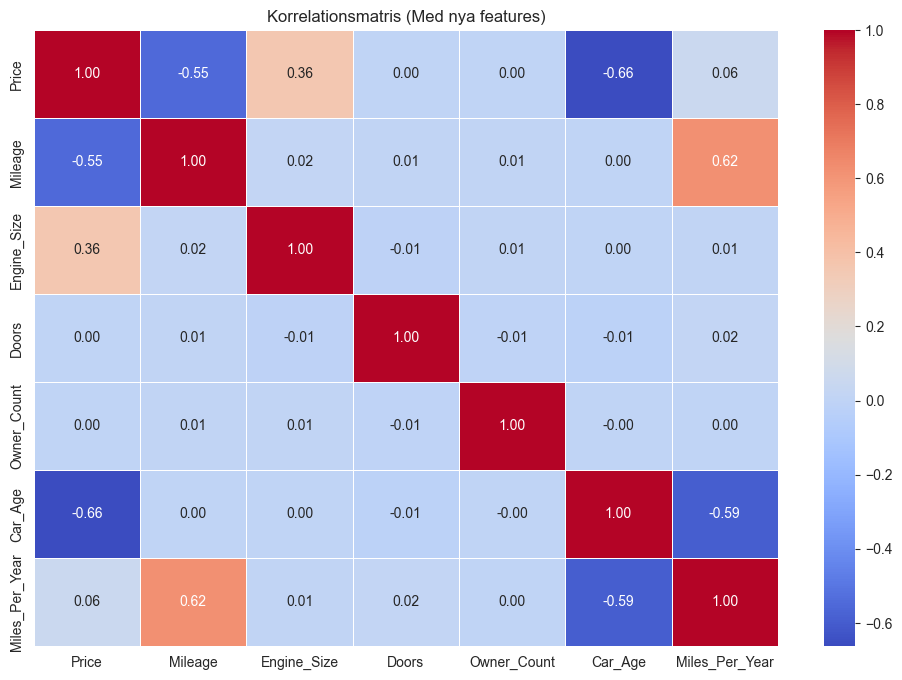

In [25]:
# Nu vill vi se hur dessa nya variabler påverkar priset
plt.figure(figsize=(12, 8))

# Vi väljer ut de numeriska kolumnerna (inklusive våra nya)
numeric_cols = ['Price', 'Mileage', 'Engine_Size', 'Doors', 'Owner_Count', 'Car_Age', 'Miles_Per_Year']
corr_matrix = df[numeric_cols].corr()

# Rita Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatris (Med nya features)")
plt.show()